In this dataset we have real estate data.We have features like number of bedrooms,size in sqaure foot and age of the house.Our task is to build a model which can predict the price of the house using the data.If you like the work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-data.csv


### Importing Python modules

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


### Importing the dataset

In [3]:
df = pd.read_csv('../input/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


We have 47 rows of data and have values of area,rooms,age and the price of house.

### Plotting Histogram

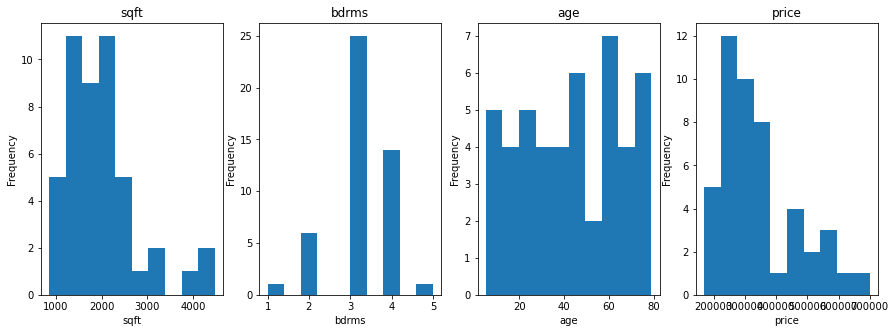

In [4]:
plt.figure(figsize = (15,5))
for i, feature in enumerate(df.columns):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist',title =feature)
    plt.xlabel(feature)

We have the distribution of all the four features in our dataset.Now we will be using the values of Area,Rooms and Age to predict he price of the house.

### Creating the Matrix of Features

In [5]:
X = df[['sqft','bdrms','age']].values
y = df[['price']].values

### Building up the Model 

In [6]:
X = df[['sqft','bdrms','age']].values
y = df['price'].values

### Building Linear Regression Model

In [7]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Dense(1,input_shape=(3,)))
model.compile(Adam(lr=0.8),'mean_squared_error')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
len(X_train)

37

In [10]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
37/37 [==============================] - 0s 5ms/step - loss: 127694705857.7297
Epoch 2/10
37/37 [==============================] - 0s 100us/step - loss: 125692670948.3243
Epoch 3/10
37/37 [==============================] - 0s 95us/step - loss: 123507213395.0270
Epoch 4/10
37/37 [==============================] - 0s 95us/step - loss: 121197974500.3243
Epoch 5/10
37/37 [==============================] - 0s 87us/step - loss: 118862919956.7568
Epoch 6/10
37/37 [==============================] - 0s 121us/step - loss: 116688999839.1351
Epoch 7/10
37/37 [==============================] - 0s 108us/step - loss: 114420245144.2162
Epoch 8/10
37/37 [==============================] - 0s 95us/step - loss: 112201309543.7838
Epoch 9/10
37/37 [==============================] - 0s 94us/step - loss: 109971436959.1351
Epoch 10/10
37/37 [==============================] - 0s 100us/step - loss: 107889379272.6487


In [11]:
df['price'].min()

169900

In [12]:
df['price'].max()

699900

We can see that the loss function is going down but it has very big value.Because the loss is calculated interm of difference of actual and predicted prices.If we look at the house price in the dataset the minimum and maximum values are 169900 and 699900 respectively.So when we calculate the loss function the value of the loss function is also bigger.One more problem here is we have only 47 data point.This is very less data for our neural network.

In [13]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


From the describe option we can seee that there is a big difference in the value range of Area,Price and the Age of the House.There is a possibility of improving our results with feature scaling/normalization.Which we will try out and see.

### Scaling the Features

In [14]:
df['sqft1000'] = df['sqft']/1000
df['age10'] = df['age']/10
df['price100k'] = df['price']/1e5

In [15]:
X = df[['sqft1000','bdrms','age10']].values
y = df['price100k'].values

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
model = Sequential()
model.add(Dense(1,input_dim =3))
model.compile(Adam(lr=0.1),'mean_squared_error')
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
37/37 [==============================] - 0s 2ms/step - loss: 65.6764
Epoch 2/50
37/37 [==============================] - 0s 101us/step - loss: 37.4111
Epoch 3/50
37/37 [==============================] - 0s 80us/step - loss: 17.6061
Epoch 4/50
37/37 [==============================] - 0s 85us/step - loss: 5.6449
Epoch 5/50
37/37 [==============================] - 0s 92us/step - loss: 1.9176
Epoch 6/50
37/37 [==============================] - 0s 102us/step - loss: 3.4137
Epoch 7/50
37/37 [==============================] - 0s 92us/step - loss: 7.2029
Epoch 8/50
37/37 [==============================] - 0s 94us/step - loss: 9.8045
Epoch 9/50
37/37 [==============================] - 0s 100us/step - loss: 9.7994
Epoch 10/50
37/37 [==============================] - 0s 84us/step - loss: 7.7340
Epoch 11/50
37/37 [==============================] - 0s 93us/step - loss: 5.1724
Epoch 12/50
37/37 [==============================] - 0s 93us/step - loss: 2.8342
Epoch 13/50
37/37 [=============

Now we can see that the the loss function has considerably reduced by scaling the features.This shows the affect of scaling on improving the accuaracy of a Machine Learning Model.

### R Square Accuracy of the model

In [18]:
from sklearn.metrics import r2_score

In [19]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train,y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test,y_test_pred)))

The R2 score on the Train set is:	0.442
The R2 score on the Test set is:	0.664


So we can see that our Acuracy score test set is lower than for train set. We can get better results if we have more data and if we can add more layers to our neural network.